In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import chirp, find_peaks, peak_widths

In [2]:
%matplotlib inline

# Simulate data

Here, we simulate experimental data for 10,000 measurements of CD diameters with normally distributed random noise with $\mu = 120$ and $\sigma = 2$. 
The standar error of the mean (SEM) is related to $\sigma$ as:

$$SEM = \frac{\sigma_{N-1}}{\sqrt{n}}$$

In [4]:
# set random number generator with defined seed value
np.random.seed(0)

# define mean and standard deviation of distribution
mu, sigma, n = 120, 2, 10000

# generate pseudo-random, normally distributed sample data
x = np.random.normal(loc = mu, scale = sigma, size = n)
sem = stats.sem(x)
print(f'mu: {mu: .2f} \n' + f'sigma: {sigma: .2f} \n' + f'standard error of the mean: {sem: .2f} \n' + f'x: {x}')

mu:  120.00 
sigma:  2.00 
standard error of the mean:  0.02 
x: [123.52810469 120.80031442 121.95747597 ... 121.03374436 119.93415861
 122.59622286]


# The histogram is a discrete approximation of the probability distribution of a random variable

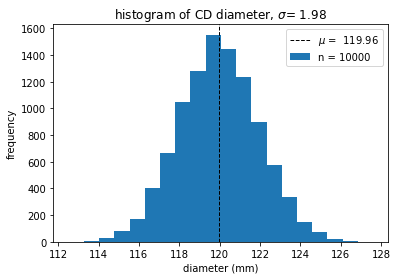

In [5]:
mean = x.mean()
stdv = x.std()
bins = 20

# plot histogram
plt.hist(x, bins, label=f'n = {n}') 
# plot vertical line at the mean
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label = f'$\mu$ = {mean: .2f}') 
# add labels 
plt.title(f'histogram of CD diameter, $\sigma$={stdv: 0.2f}')
plt.xlabel('diameter (mm)')
plt.ylabel('frequency')
plt.legend();

Note that the scale of the SEM is small compared to the mean and is barely visible. 

# Plot full-width half-maximum (FWHM) of PDF

The FWHM is related to $\sigma$ by:

$$FWHM = 2 \sqrt{2ln(2)} \sigma$$
$$\approx 2.355 \sigma$$

In [6]:
# calculate FWHM scalar
fwhm_scalar = 2 * np.sqrt(2 * np.log(2))
# calculate FWHM
fwhm = sigma * fwhm_scalar

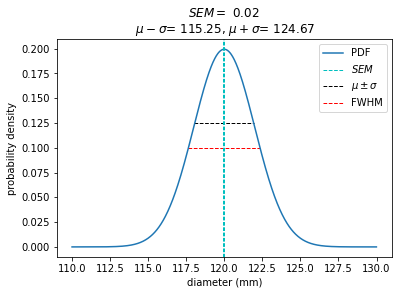

In [7]:
 # calculate mean and standard deviation
mean, stdv = x.mean(), x.std()

# define number of bins
bins = 20

# plot normalized histogram
#plt.hist(x, bins, density=True, label=f'n = {n}')
#plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label = f'$\mu$ = {mean: .2f}')
plt.title(f'$SEM = ${sem: .2f} \n $\mu - \sigma$={-fwhm + mean: 0.2f}, $\mu + \sigma$={fwhm + mean: 0.2f}')
plt.xlabel('diameter (mm)')
plt.ylabel('probability density')

# plot PDF 
bin_array = np.linspace(110, 130, 1000) # create array of bins
bin_centers = 0.5*(bin_array[1:] + bin_array[:-1]) # calculate bin centers from array
pdf = stats.norm.pdf(x = bin_centers, loc=mu, scale=sigma) # calculate PDF
plt.plot(bin_centers, pdf, label="PDF")

# find peak of PDF
peaks, _ = find_peaks(pdf, height=0.05)
# plot verticle lines at +/- sem
plt.axvline(sem + mean, color='c', linestyle='dashed', linewidth=1, label = '$SEM$')
plt.axvline(-sem + mean, color='c', linestyle='dashed', linewidth=1) 
# plot horizontal line at sigma +/- mean 
plt.hlines(0.125, -stdv + mean, stdv + mean, colors='k', linestyles='dashed', linewidth=1, label = f'$\mu \pm \sigma$')
# plot FWHM
plt.hlines(0.5 * pdf[peaks], - 0.5 * fwhm + mean, 0.5 * fwhm + mean, linestyle='dashed', linewidth=1, color="r", label='FWHM')

plt.legend();


In [ ]:
stop

NameError: ignored

In [ ]:
pdf[peaks]

In [ ]:
 # calculate mean and standard deviation
mean, stdv = x.mean(), x.std()

# define number of bins
bins = 20

# plot normalized histogram
#plt.hist(x, bins, density=True, label=f'n = {n}')
#plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label = f'$\mu$ = {mean: .2f}')
plt.title(f'histogram of CD diameter, $\sigma$={stdv: 0.2f}')
plt.xlabel('diameter (mm)')
plt.ylabel('probability density')

# add PDF to normalized histogram
bin_array = np.linspace(110, 130, 1000) # create array of bins
bin_centers = 0.5*(bin_array[1:] + bin_array[:-1]) # calculate bin centers from array
pdf = stats.norm.pdf(x = bin_centers, loc=mu, scale=sigma) # calculate PDF
plt.plot(bin_centers, pdf, label="PDF")

# find peaks and calculate FWHM
peaks, _ = find_peaks(pdf, height=0.05)
#peaks = find_peaks(pdf, height=0.05)[1]['peak_heights']
half_max = peak_widths(pdf, peaks, rel_height=0.5) 

# plot FWHM
plt.plot(mean, pdf[peaks], "x")

plt.hlines(half_max[1], half_max[-1] - 500, half_max[-2] - 200, linestyle='dashed', color="r")
#plt.hlines(*half_max[1:])
plt.legend();


In [ ]:
interp_lower = half_max[-1] - 500
interp_lower

In [ ]:
interp_upper = half_max[-2] - 200
interp_upper

In [ ]:
half_max[1:]